In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as sts

# Разведка

In [ ]:
df_raw = pd.read_csv("titanic.csv")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df_raw.drop(columns=["PassengerId"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 0.98, 'Парные диаграммы рассеяния')

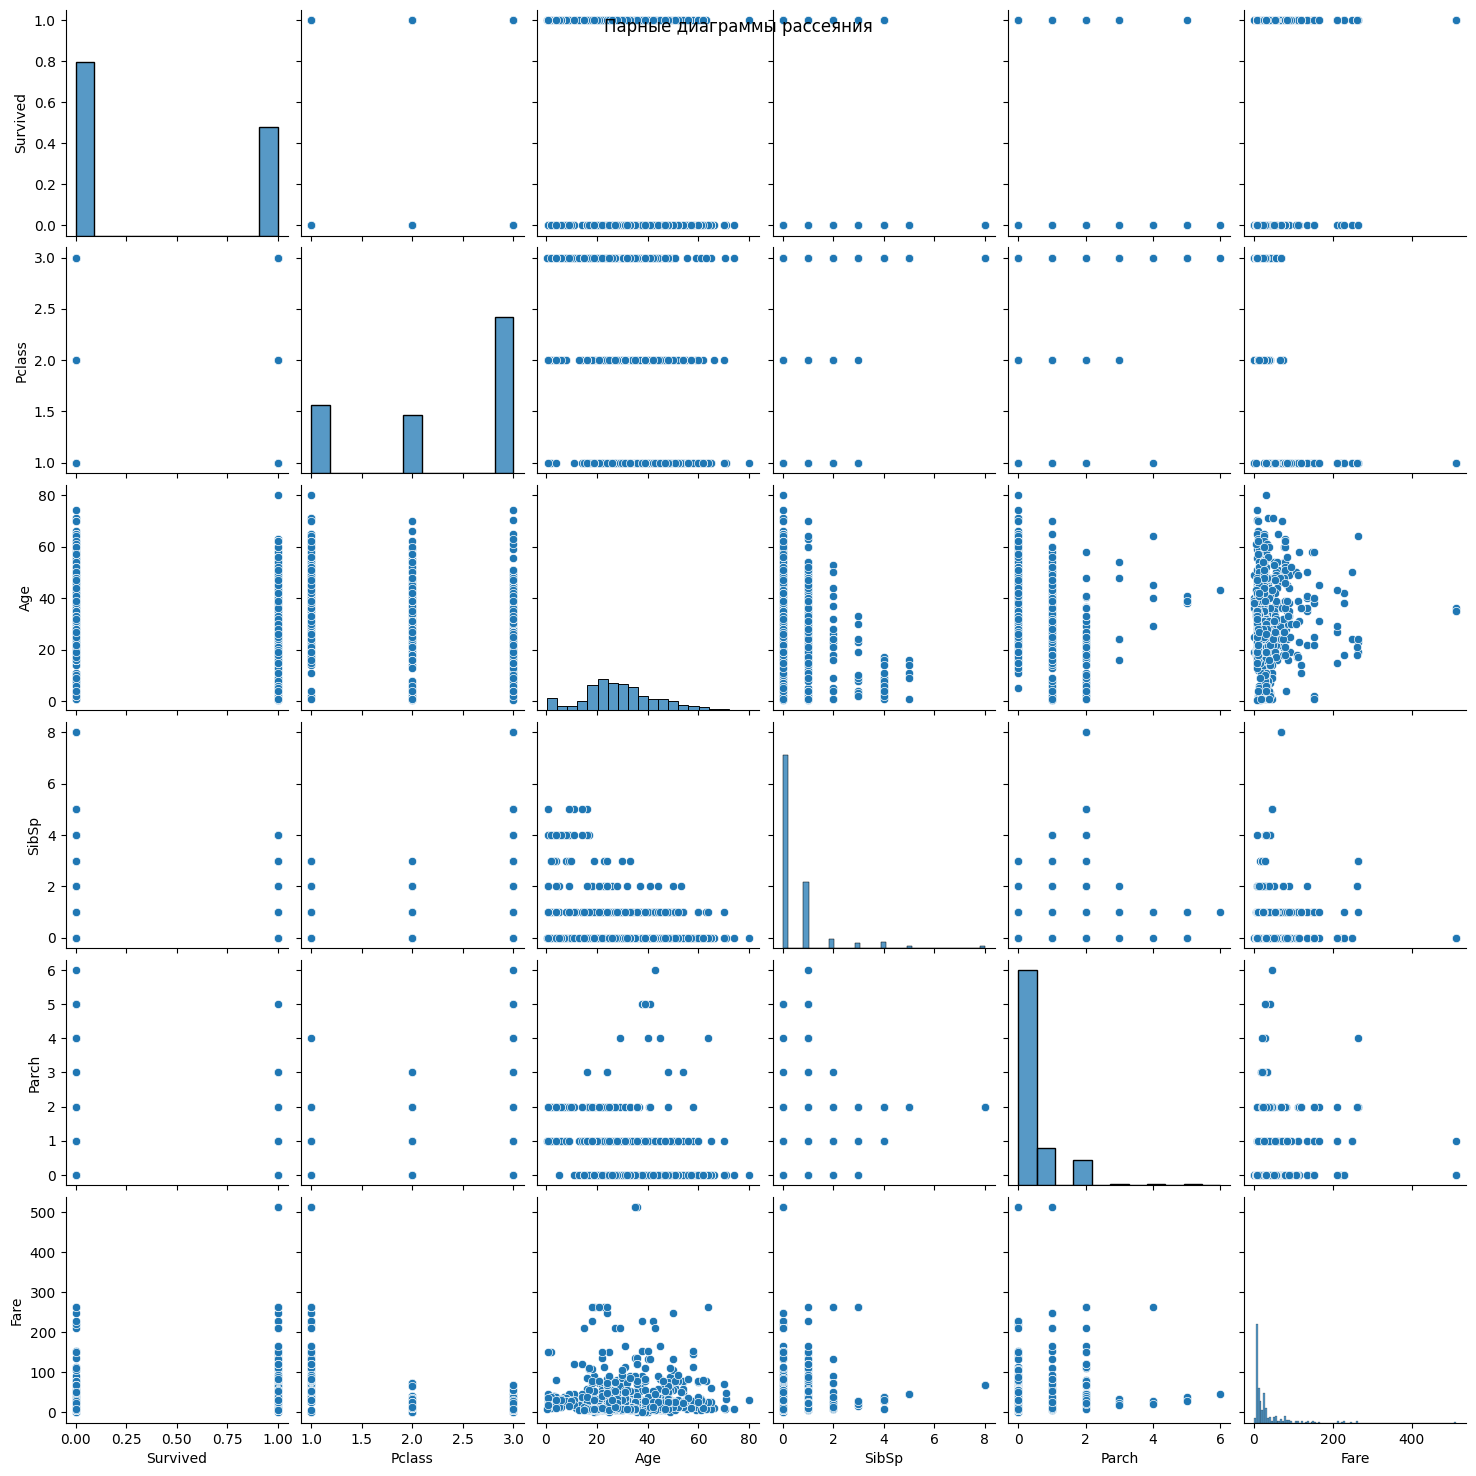

In [ ]:
sns.pairplot(df)
plt.suptitle("Парные диаграммы рассеяния")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
for cn in ["Name", "Ticket",	"Cabin", 	"Embarked"]:
  print(f"Признак: {cn}")
  print(f"Значений всего: {len(df[cn])}")
  print(f"Уникальных значений: {len(df[cn].unique())}")
  print(f"Пропущено значений: {df[cn].isna().sum()}")
  print()

Признак: Name
Значений всего: 891
Уникальных значений: 891
Пропущено значений: 0

Признак: Ticket
Значений всего: 891
Уникальных значений: 681
Пропущено значений: 0

Признак: Cabin
Значений всего: 891
Уникальных значений: 148
Пропущено значений: 687

Признак: Embarked
Значений всего: 891
Уникальных значений: 4
Пропущено значений: 2



In [ ]:
fig, ax = plt.subplots(1, 7)
fig.set_size_inches(30, 6)
fig.suptitle('Сравнение с нормальным распределением ', fontsize=20)

for i, column_name in enumerate(df.columns):
    x = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
    sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i], hist_kws={'label':'гистограмма относительных частот'}, fit_kws={'label':'плотность теоретического распределения'})
ax[0].legend(bbox_to_anchor=(1.75 , -0.1 ), borderaxespad= 0, fontsize=15)

In [ ]:
fig, ax = plt.subplots(1, 7)
fig.set_size_inches(30, 6)
for i, column_name in enumerate(df.columns):
    ax[i].boxplot(df[column_name],)
    ax[i].set_xlabel(column_name)


<ipython-input-18-92afeaa975a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})


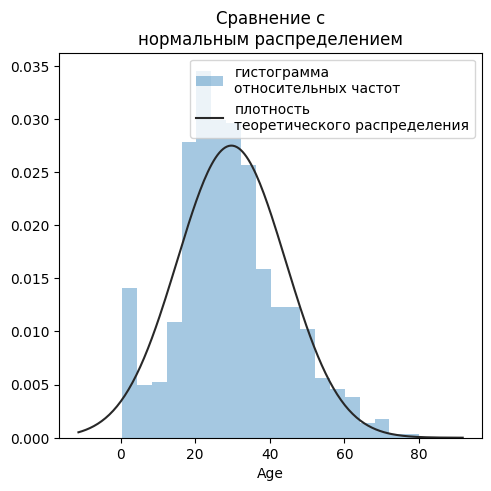

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df.Age, kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nнормальным распределением')
plt.legend()

<ipython-input-24-cc5d48bb0f0c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, kde=False, fit=sts.lognorm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})


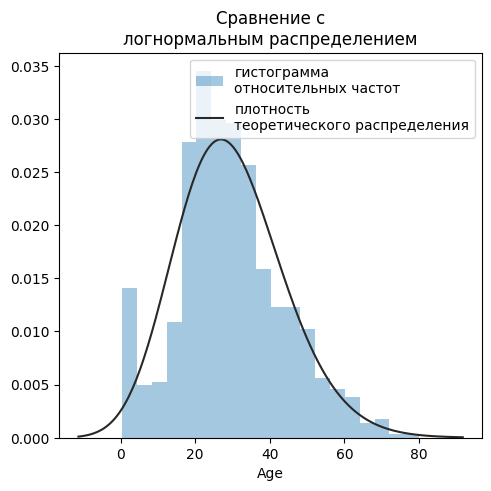

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df.Age, kde=False, fit=sts.lognorm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nлогнормальным распределением')
plt.legend()

In [ ]:
numeric = df[["Survived", 	"Pclass", "Age", 	"SibSp", 	"Parch", 	"Fare"]]
numeric.corr(method="spearman")

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


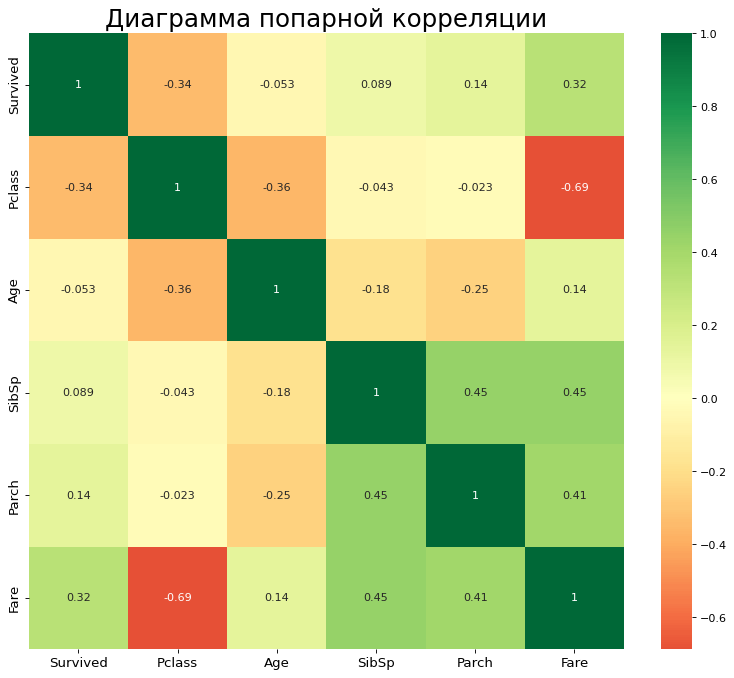

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(numeric.corr("spearman"), xticklabels=numeric.corr().columns, yticklabels=numeric.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Диаграмма попарной корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
sts.spearmanr(df.Pclass, df.Fare)

SignificanceResult(statistic=-0.6880316726256098, pvalue=6.194553731421917e-126)

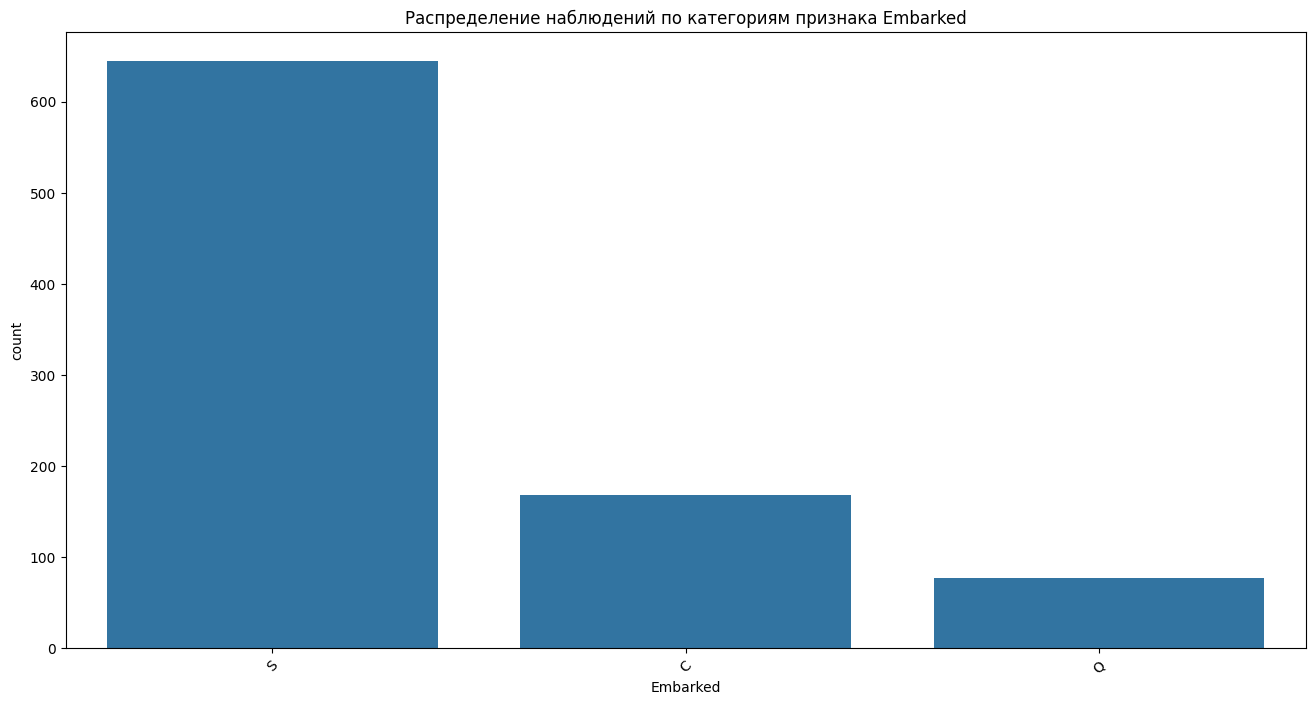

In [ ]:
plt.subplots(figsize=(16, 8))
sns.countplot(x='Embarked', data=df)
plt.title('Распределение наблюдений по категориям признака Embarked')
plt.xticks(rotation=45)
print()

In [ ]:
cross_tab = pd.crosstab(data['Направление деятельности'], data['Образование'], margins=True)

obs = np.array(cross_tab.iloc[:-1,:-1])
marg_s = np.array(cross_tab.iloc[[-1],:-1])
marg_c = np.array(cross_tab.iloc[:-1,[-1]])

exp = np.dot(marg_c, marg_s)/cross_tab.iloc[-1, -1]
ddof = obs.shape[0] + obs.shape[1] - 2

chi2_result = sts.chisquare(obs, exp, ddof, None)
print(chi2_result)

chi2 = chi2_result[0]  # наблюдаемое значение хи-квадрат
V = (chi2/(cross_tab.iloc[-1, -1]*min(obs.shape[0]-1, obs.shape[1]-1)))**0.5
print("Коэффициент Крамера V =", V)

# Линейная регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Вывод весов признаков и bias, полученных по результатам обучения
print("Веса признаков ", model.coef_)
print("Bias ", model.intercept_)

NameError: name 'train_test_split' is not defined

In [ ]:
y_pred_train = model.predict(X_train)

mse_train = mse(y_train, y_pred_train)
mse_train

In [ ]:
print("l  alpha  mse(test) mae(test) r2(test)")
for l in ("l1", "l2"):
    for a in (0.01, 0.1, 0.5, 1, 5, 10, 15):
        sgdr = SGDRegressor(penalty=l, alpha=a)
        sgdr.fit(x_train_scaled, np.ravel(y_train))

        y_test_predict = sgdr.predict(x_test_scaled)
        print(l, a, round(mse(y_test, y_test_predict), 2), round(mae(y_test, y_test_predict), 2), round(r2(y_test, y_test_predict), 2))

    print()

# Классификация

In [ ]:
params_grid = {
"loss": ['huber', 'perceptron', 'squared_error', 'log_loss'],
"penalty": ['l1', 'l2'],
"alpha": np.linspace(0.000001, 10, 11),
"n_iter_no_change": [i for i in range(5, 11)],
"max_iter": [10000]
}

clf = GridSearchCV(SGDClassifier(), params_grid, scoring='f1_micro', cv=5)
clf.fit(x_train_scaled, y_train)
pd.DataFrame(clf.cv_results_)

clf.best_estimator_
clf.best_params_
clf.best_score_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score,f1_score
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(axis=1, labels='Класс'), data['Класс'], random_state=6)

print('Размерность обучающей выборки', X_train.shape, y_train.shape)
print('Размерность тестовой выборки', X_test.shape, y_test.shape)

print('Распределение классов в обучающей выборке', y_train.value_counts())
print('Распределение классов в тестовой выборке', y_test.value_counts())

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(C=2)
model.fit(X_train, y_train)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, y_pred_train))
print('precision =', precision_score(y_train, y_pred_train))
print('recall =', recall_score(y_train, y_pred_train))
print('f-мера =', f1_score(y_train, y_pred_train))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))


pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривая')

pred_proba_train = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, y_pred_train))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score,f1_score
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve, r2_score, mean_squared_error, mean_absolute_error
import sklearn.preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, y_pred_train))
print('precision =', precision_score(y_train, y_pred_train))
print('recall =', recall_score(y_train, y_pred_train))
print('f-мера =', f1_score(y_train, y_pred_train))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

name = 'дерево решений'
ans = [
]
ans.append([name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])

In [ ]:
for depth in range(2, 13):
  model=tree.DecisionTreeClassifier(criterion="entropy", max_depth = depth, random_state = 6)
  model.fit(X_train,y_train)
  print()
  print('На обучающей выборке:')
  print('accuracy =', accuracy_score(y_train, y_pred_train))
  print('precision =', precision_score(y_train, y_pred_train))
  print('recall =', recall_score(y_train, y_pred_train))
  print('f-мера =', f1_score(y_train, y_pred_train))
  print()
  print('На тестовой выборке:')
  print('accuracy =', accuracy_score(y_test, y_pred))
  print('precision =', precision_score(y_test, y_pred))
  print('recall =', recall_score(y_test, y_pred))
  print('f-мера =', f1_score(y_test, y_pred))

In [ ]:
model=tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 7)
model.fit(X_train,y_train)
print()
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, y_pred_train))
print('precision =', precision_score(y_train, y_pred_train))
print('recall =', recall_score(y_train, y_pred_train))
print('f-мера =', f1_score(y_train, y_pred_train))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

name = 'неполное дерево'

ans.append([name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])


In [ ]:
_=tree.plot_tree(model, filled=True)

In [ ]:
model = RandomForestClassifier(n_estimators=5, random_state = 7)

model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()


name = 'случайный лес 5 деревьев'

ans.append([name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])

In [ ]:
feature_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feature_imp

In [ ]:
model = RandomForestClassifier(n_estimators=15, random_state = 7)

model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()

name = 'лучший случайный лес'

ans.append([name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(axis=1, labels='cardio'), data['cardio'], random_state=6)




model=tree.DecisionTreeClassifier(criterion="entropy",random_state = 7)
model.fit(X_train,y_train)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()


print()
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, y_pred_train))
print('precision =', precision_score(y_train, y_pred_train))
print('recall =', recall_score(y_train, y_pred_train))
print('f-мера =', f1_score(y_train, y_pred_train))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state = 7)

model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()

print()
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, y_pred_train))
print('precision =', precision_score(y_train, y_pred_train))
print('recall =', recall_score(y_train, y_pred_train))
print('f-мера =', f1_score(y_train, y_pred_train))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(axis=1, labels='PRICE'), data['PRICE'], random_state=7)


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Строим модель дерева решений
for x in range(1, 101, 10):
  regr = RandomForestRegressor(n_estimators=x, random_state=1)
  regr.fit(X_train, y_train)

  # Строим предсказания стоимости по обучающей и тестовой выборкам
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)

  # Оценим качество модели
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)
  print()
  print('Число ансамблей', x)
  print("mse_train={:.2f}".format(mse_train))
  print("mse_test={:.2f}".format(mse_test))
  print()
  print("r2_train={:.2f}".format(r2_train))
  print("r2_test={:.2f}".format(r2_test))
  print()